<a href="https://colab.research.google.com/github/ajit2001/codsoft_1/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic Survival Prediction

In [ ]:
# Importing all the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('tested.csv')

Data Exploration & Preprocessing

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


Check for nulls & duplicates

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Filling the nulls

In [ ]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


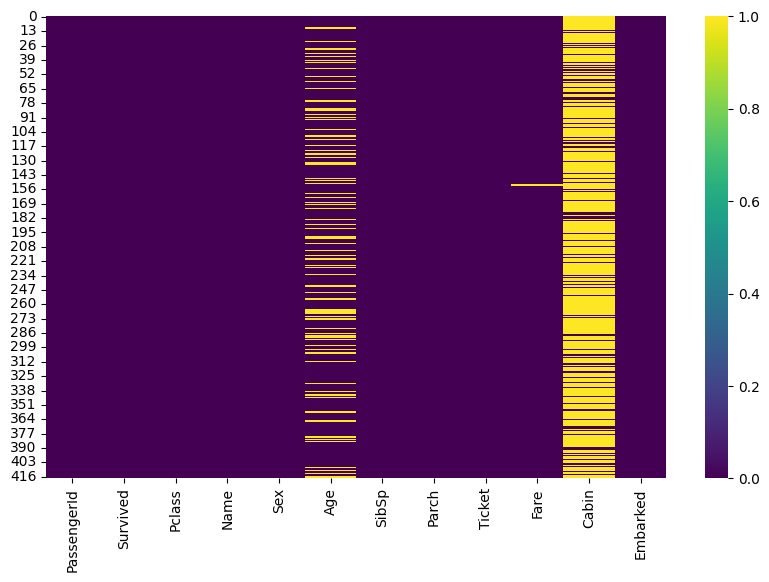

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cmap='viridis')
plt.show()

In [ ]:
mean_c3 = df.Fare[df.Pclass == 3].mean()
df['Fare'].fillna(value=mean_c3, inplace=True)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.750000,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.0000,1.000000,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.000000,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.000000,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.000000,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.000000,9.0000
Fare,418.0,35.571764,55.851997,0.00,7.8958,14.4542,31.471875,512.3292


In [ ]:
df.describe(include='O').T

,count,unique,top,freq
Name,418,418,"Kelly, Mr. James",1
Sex,418,2,male,266
Ticket,418,363,PC 17608,5
Cabin,91,76,B57 B59 B63 B66,3
Embarked,418,3,S,270


Filling Age

To fill the age, we can check the titles (Miss, Mr, Mrs, Master, Dr) and take the age average of each one, then fill the age according to the title

In [ ]:
mean_age_miss = df[df["Name"].str.contains('Miss.', na=False)]['Age'].mean().round()
mean_age_mrs = df[df["Name"].str.contains('Mrs.', na=False)]['Age'].mean().round()
mean_age_mr = df[df["Name"].str.contains('Mr.', na=False)]['Age'].mean().round()
mean_age_master = df[df["Name"].str.contains('Master.', na=False)]['Age'].mean().round()

print("The mean age of Miss title: ",mean_age_miss)
print("The mean age of Mrs title: ",mean_age_mrs)
print("The mean age of Mr title: ",mean_age_mr)
print("The mean age of Master: ",mean_age_master)

The mean age of Miss title:  22.0
The mean age of Mrs title:  39.0
The mean age of Mr title:  34.0
The mean age of Master:  7.0


In [ ]:
def filling_age(name_age):
    name = name_age[0]
    age = name_age[1]
    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age
df['Age'] = df[['Name', 'Age']].apply(filling_age,axis=1)

We are dropping the cabin column because it has a lot of null values

In [ ]:
df.drop(['Cabin'], axis=1, inplace=True)

In [ ]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

Visualisations

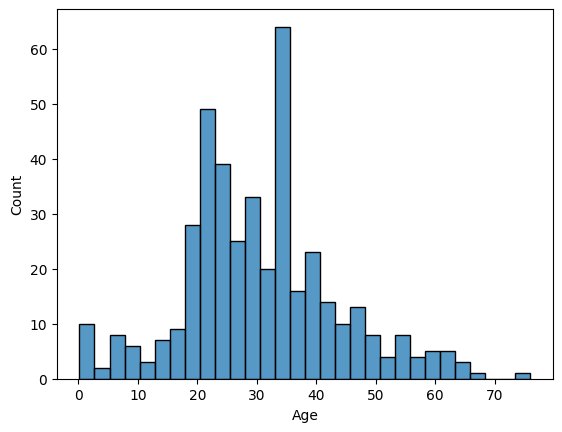

In [ ]:
sns.histplot(data=df,x=df['Age'],kde=False,bins=30);

In [ ]:
df.Age.mean()

30.470095693779903

In [ ]:
df.Age.median()

30.0

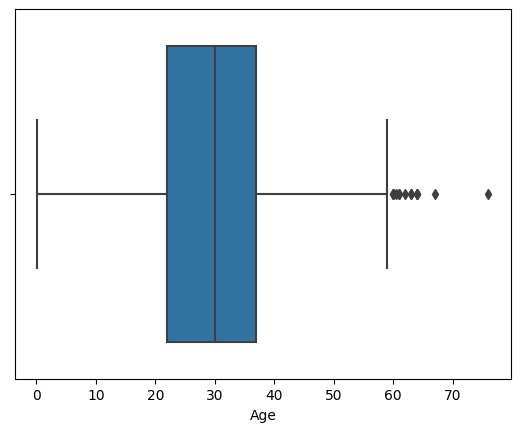

In [ ]:
sns.boxplot(data=df, x='Age');


In [ ]:
df.groupby('Pclass').Age.median()

Pclass
1    39.0
2    28.0
3    26.0
Name: Age, dtype: float64

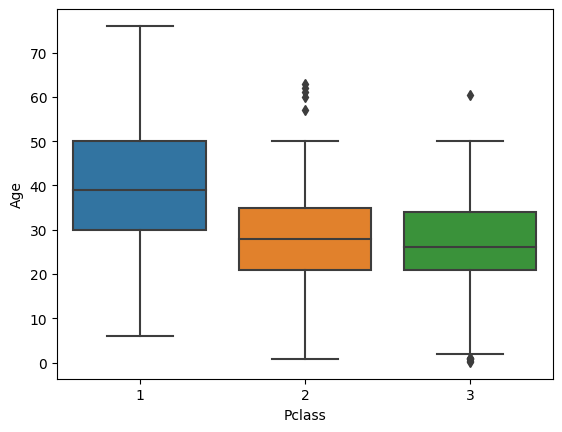

In [ ]:
sns.boxplot(data=df,x='Pclass',y='Age');

In [ ]:
df.groupby(['Pclass','Sex']).Age.median()

Pclass  Sex   
1       female    39.0
        male      41.0
2       female    24.0
        male      29.0
3       female    22.0
        male      28.5
Name: Age, dtype: float64

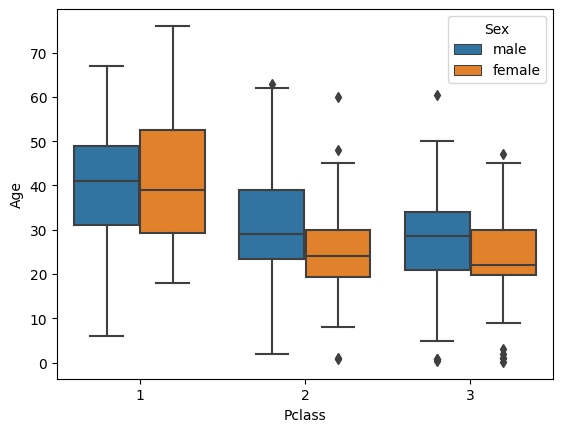

In [ ]:
sns.boxplot(data=df,x='Pclass',y='Age',hue='Sex');

In [ ]:
df['Age'] = df['Age'].fillna(df.groupby(['Pclass','Sex']).Age.transform('median'))

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df.nunique()

Survived      2
Pclass        3
Sex           2
Age          79
SibSp         7
Parch         8
Fare        170
Embarked      3
dtype: int64

Categorical Features

In [ ]:
df_cat = df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Survived']]
df_cat.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,0,0,Q,0
1,3,female,1,0,S,1
2,2,male,0,0,Q,0
3,3,male,0,0,S,0
4,3,female,1,1,S,1


In [ ]:
categories = {"female": 1, "male": 0}
df['Sex']= df['Sex'].map(categories)

new_df = pd.concat([df, pd.get_dummies(df['Embarked'],drop_first=True)], axis=1)

new_df.drop(['Embarked'], axis=1, inplace=True)

In [ ]:
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,0,3,0,34.5,0,0,7.8292,1,0
1,1,3,1,47.0,1,0,7.0000,0,1
2,0,2,0,62.0,0,0,9.6875,1,0
3,0,3,0,27.0,0,0,8.6625,0,1
4,1,3,1,22.0,1,1,12.2875,0,1


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    int64  
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Q         418 non-null    uint8  
 8   S         418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 23.8 KB


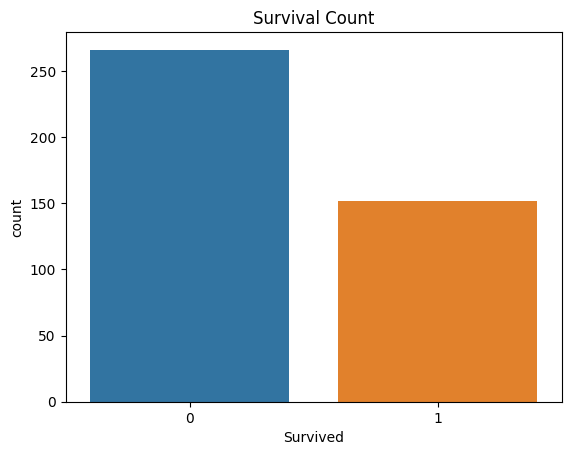

In [ ]:
# Exploring the target variable
sns.countplot(x='Survived', data=new_df)
plt.title('Survival Count')
plt.show()

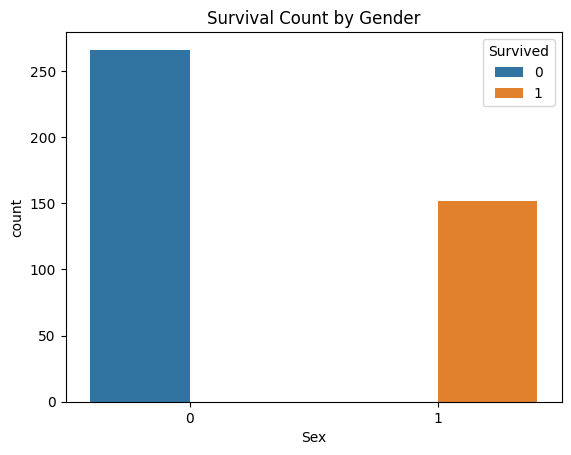

In [ ]:
# Exploring categorical variables
sns.countplot(x='Sex', hue='Survived', data=new_df)
plt.title('Survival Count by Gender')
plt.show()

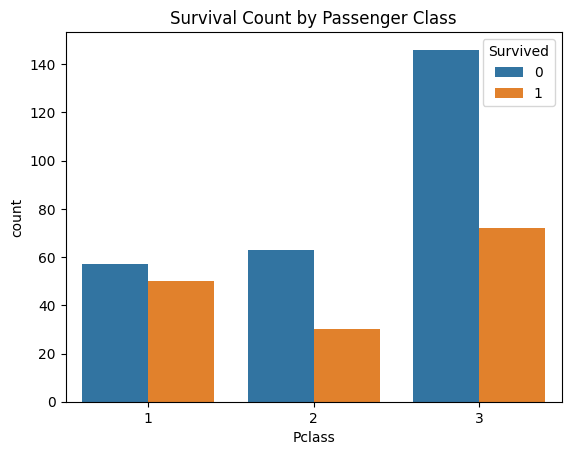

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=new_df)
plt.title('Survival Count by Passenger Class')
plt.show()

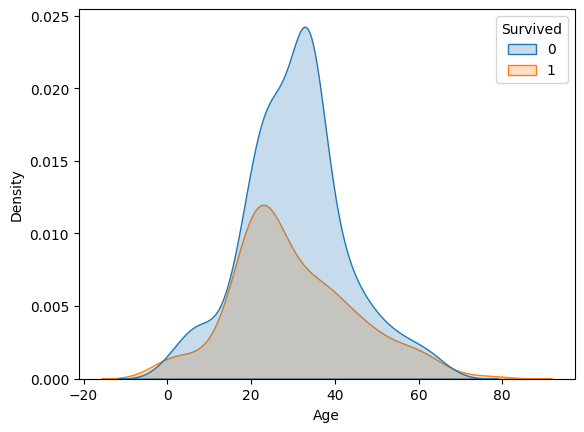

In [ ]:
sns.kdeplot(data=new_df, x='Age', hue='Survived', fill=True);

Correlation

In [ ]:
corr = new_df.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
Survived,1.000000,-0.108615,1.000000,-0.025462,0.099943,0.159120,0.192094,0.115574,-0.105883
Pclass,-0.108615,1.000000,-0.108615,-0.436823,0.001087,0.018721,-0.577368,0.252608,0.120783
Sex,1.000000,-0.108615,1.000000,-0.025462,0.099943,0.159120,0.192094,0.115574,-0.105883
Age,-0.025462,-0.436823,-0.025462,1.000000,-0.104316,-0.036099,0.309443,-0.049533,-0.113734
SibSp,0.099943,0.001087,0.099943,-0.104316,1.000000,0.306895,0.171949,-0.098824,0.079367
Parch,0.159120,0.018721,0.159120,-0.036099,0.306895,1.000000,0.230352,-0.132948,0.092201
Fare,0.192094,-0.577368,0.192094,0.309443,0.171949,0.230352,1.000000,-0.155157,-0.179163
Q,0.115574,0.252608,0.115574,-0.049533,-0.098824,-0.132948,-0.155157,1.000000,-0.474962
S,-0.105883,0.120783,-0.105883,-0.113734,0.079367,0.092201,-0.179163,-0.474962,1.000000


<Axes: >

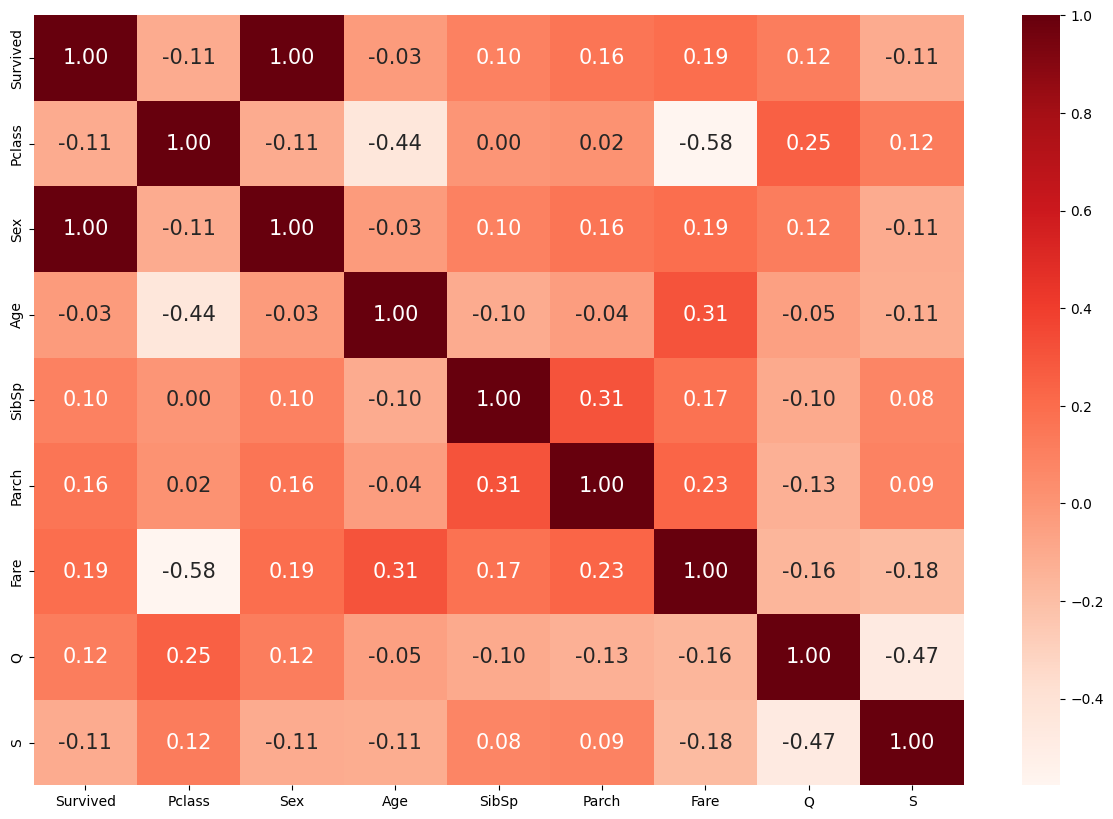

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar=True, fmt='.2f', annot=True, annot_kws={'size':15}, cmap='Reds')

we can clearly notice that the Sex attribute has a completly strong positive correlation (100%) with the target column so we have to drop it to avoid overfitting in our model.

In [ ]:
new_df.drop(['Sex'], axis=1, inplace=True)

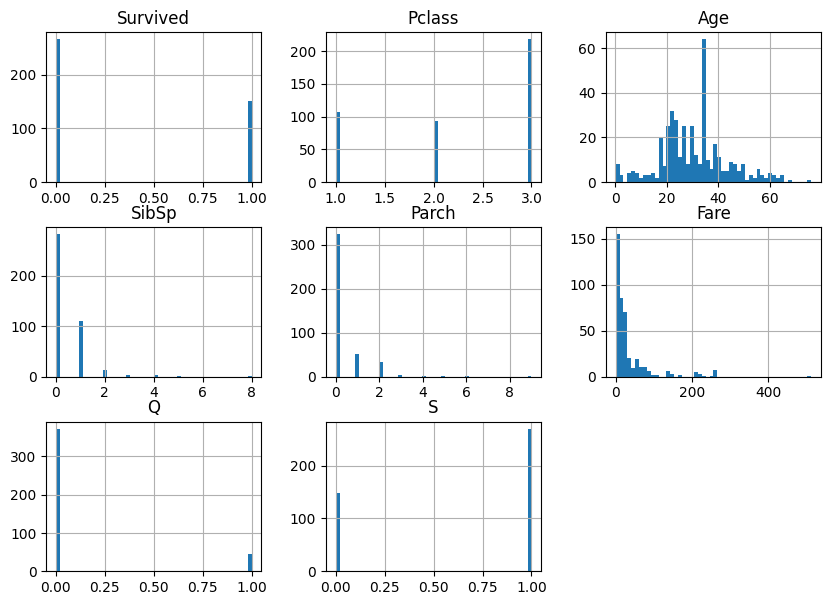

In [ ]:
new_df.hist(bins=50, figsize=(10,7))
plt.show()

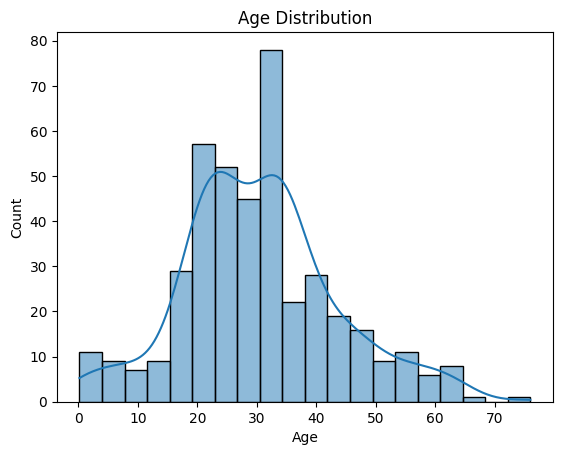

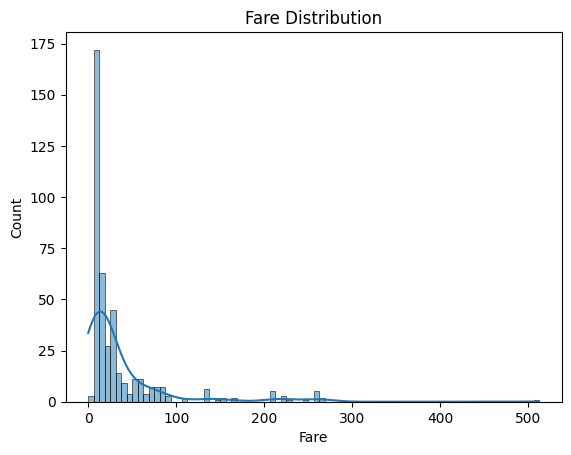

In [ ]:
# Clearer histogram plots for the Age and  Fare columns
sns.histplot(x='Age', data=new_df, kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(x='Fare', data=new_df, kde=True)
plt.title('Fare Distribution')
plt.show()

In [ ]:
# Calculate IQR
q1 = new_df['Fare'].quantile(0.25)
q3 = new_df['Fare'].quantile(0.75)
iqr = q3 - q1

# Define range
lower_range = q1 - 1.5 * iqr
upper_range = q3 + 1.5 * iqr

# Identify outliers
outlier_indices = new_df[(new_df['Fare'] < lower_range) | (new_df['Fare'] > upper_range)].index

# Remove outliers
cleaned_df = new_df.drop(outlier_indices)

In [ ]:
## importing modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X = cleaned_df.drop(['Survived'], axis=1)
y = cleaned_df['Survived']

In [ ]:
## Data normalization
from sklearn.preprocessing import MinMaxScaler
mns = MinMaxScaler()
X = pd.DataFrame(mns.fit_transform(X), columns=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

Training the Model.

Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=2)
rf.fit(X_train, y_train)
print('Training score: ', round(rf.score(X_train, y_train),3))
print('Testing score: ', round(rf.score(X_test, y_test),3))

Training score:  0.846
Testing score:  0.716


Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Training score: ', round(logreg.score(X_train, y_train),3))
print('Testing score: ', round(logreg.score(X_test, y_test),3))

Training score:  0.689
Testing score:  0.615


SVM

In [ ]:
svm = SVC()
svm.fit(X_train, y_train)
print('Training score: ', round(svm.score(X_train, y_train),3))
print('Testing score: ', round(svm.score(X_test, y_test),3))

Training score:  0.693
Testing score:  0.587


K-Neighbors Classifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Training score: ', round(knn.score(X_train, y_train),3))
print('Testing score: ', round(knn.score(X_test, y_test),3))

Training score:  0.78
Testing score:  0.734
